In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Er = np.array([3.638, 3.951, 4.382, 3.689, 4.094, 3.871, 4.820, 4.754, 4.331, 4.754, 5.247, 5.236])
rmid = np.array([1.910, 1.833, 1.749, 1.658, 1.558, 1.447, 1.322, 1.179, 1.012, 0.811, 0.560, 0.223])
errEr = np.array([0.186, 0.164, 0.147, 0.182, 0.157, 0.169, 0.139, 0.140, 0.148, 0.140, 0.135, 0.135])
errrmid = np.array([0.000052, 0.000056, 0.000061, 0.000067, 0.000074, 0.000082, 0.000093, 0.00011, 0.00013, 0.00016, 0.00020, 0.00028])


In [5]:
x = rmid
y = Er
dy = errEr
dx = errrmid

In [6]:
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
fit = b+m*x

In [8]:
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))

In [9]:
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)


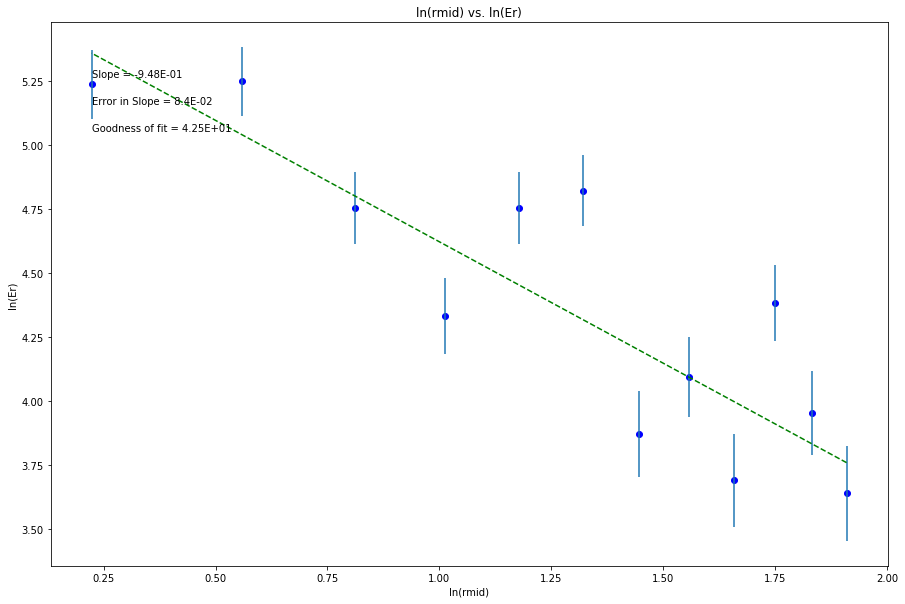

In [13]:
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel('ln(rmid)')
plt.ylabel('ln(Er)')
plt.title('ln(rmid) vs. ln(Er)')
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
plt.show()
